# Solubility Challenge

### part of the data analyisis and model prediction by team: C. Di Paola, J. Manson and K. Makobe
### revised, adapted and completed (also including a bigger data set) by: C. Di Paola

## Import necessary initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(threshold=np.inf)
#%load_ext autotime

## Read files for analyis and prediction

We need solubility data and DRAGON 2D descriptors from the training set and DRAGON 2D descriptors for prediction data set

'bd' files are coming from bigger solubility training data

In [2]:
#solub=pd.read_excel('soldata.xls')
solub_train_data=pd.read_excel('soldata_trainingset.xls')
solub_train_descriptors=pd.read_excel('Solubility_training_descriptors_cleaned.xlsx')
solub_pred_descriptors=pd.read_excel('Solubility_prediction_descriptors_cleaned.xlsx')
solub_pred_data=pd.read_excel('soldata_prediction_withSvalues.xlsx')
solub_train_bd_1=pd.read_csv('./LargerDataset/solubility_combined_values_noNA_rows_1.csv')
#solub_tran_bigdata_2=pd.read_csv('./LargerDataset/solubility_combined_values_noNA_rows_2.csv')

/anaconda3/envs/fm1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Analysis (Pre-processing data)

### * data shape and formatting for training data

In [3]:
solub_train_data.head()

,Substance,Temperature,assays,Ionic Strength (M),S0 (mM),SD of S0 (mM),Kinetic Solubility (mM),SD of Kinetic Solubility (mM),Unnamed: 8,Unnamed: 9,SMILES,InChI
0,1_naphthol,25.89,4.0,0.17121,10432.300,408.616,18026.0,11884,NaN,NaN,c1ccc2c(cccc2O)c1,InChI=1/C10H8O/c11-10-7-3-5-8-4-1-2-6-9(8)10/h...
1,2_amino_5_bromobenzoic_acid,25.00,5.0,0.16295,842.692,14.6303,2562.0,863.3,NaN,NaN,Brc1cc(C(O)=O)c(N)cc1,InChI=1/C7H6BrNO2/c8-4-1-2-6(9)5(3-4)7(10)11/h...
2,4_iodophenol,25.74,4.0,0.218635,19312.000,604.678,25091.0,8427,NaN,NaN,c1cc(ccc1O)I,"InChI=1/C6H5IO/c7-5-1-3-6(8)4-2-5/h1-4,8H"
3,5_bromo_2_4_dihydroxybenzoic_acid,25.05,5.0,0.186497,2397.220,40.1944,8726.0,753.8,NaN,NaN,Oc1c(Br)cc(C(O)=O)c(O)c1,InChI=1/C7H5BrO4/c8-4-1-3(7(11)12)5(9)2-6(4)10...
4,5_fluorouracil,25.10,NaN,No precipitation detected. Kinetic solubility ...,NaN,NaN,NaN,NaN,NaN,NaN,Fc1c(=O)[nH]c(=O)[nH]c1,"InChI=1/C4H3FN2O2/c5-2-1-6-4(9)7-3(2)8/h1H,(H2..."


In [4]:
solub_train_descriptors.head()

,No.,NAME,MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,...,Depressant-50,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,1,1-Naphthol ...,144.18,7.588,12.822,0.675,0.993,0.711,1.098,11,...,0,0,0,0,0,0,0,0,0,0
1,2,2_amino_5_bromo_benzoic_acid ...,216.04,12.708,12.057,0.709,1.037,0.738,1.118,7,...,0,0,0,0,0,0,0,0,1,0
2,3,4-Iodophenol ...,220.01,16.924,9.612,0.739,1.004,0.877,1.090,6,...,0,0,0,0,0,0,0,0,0,0
3,4,5_bromo_2_4_dihydroxybenzoic_acid ...,233.02,13.707,12.465,0.733,1.070,0.733,1.113,7,...,0,0,0,0,0,0,0,0,0,0
4,5,5_fluorouracil ...,130.09,10.841,8.383,0.699,1.105,0.635,1.181,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
solub_train_bd_1.head()

,Compound_Identifier,Source,SMILES,LogS.M.,Solubility.microgram.mL.,Solubility.micromolar.,MW,AMW,Sv,Se,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,DE_10,Delaney,C1CCc2ccccc2C1,-4.37,NaN,NaN,132.22,6.010,13.161,21.302,...,0,0,0,0,0,0,0,0,0,0
1,DE_100,Delaney,Nc1cccc2ccccc12,-1.92,NaN,NaN,143.20,7.160,13.129,19.636,...,0,0,0,0,0,0,0,0,0,0
2,DE_1000,Delaney,CCCc1ccccc1,-3.37,NaN,NaN,120.21,5.724,12.161,20.302,...,0,0,0,0,0,0,0,0,0,0
3,DE_1001,Delaney,CCCC1CCCC1,-4.74,NaN,NaN,112.24,4.677,12.214,23.069,...,0,0,0,0,0,0,0,0,0,0
4,DE_1005,Delaney,CC(C)(C)c1ccc(O)cc1,-2.41,NaN,NaN,150.24,6.010,14.402,24.513,...,0,0,0,0,0,0,0,0,1,0


In [7]:
solub_train_bd_1['LogS.M.']=pd.to_numeric(solub_train_bd_1['LogS.M.'], errors='coerce')

In [9]:
solub_pred_data.head()

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
0,Acebutolol,Acebutolol ...,336.48,2113.05,711,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1,InChI=1/C18H28N2O4/c1-5-6-18(23)20-14-7-8-17(1...
1,Amoxicillin,Amoxicillin ...,365.45,10671.8,3900,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...,InChI=1/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(...
2,Bendroflumethiazide,Bendroflumethiazide ...,421.46,50.3,21.2,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...,"InChI=1/C15H18F3N3O4Rn2/c16-15(17,18)10-7-11-1..."
3,Benzocaine,Benzocaine ...,165.21,4721.26,780,NC1=CC=C(C(OCC)=O)C=C1,InChI=1/C9H11NO2/c1-2-12-9(11)7-3-5-8(10)6-4-7...
4,Benzthiazide,Benzthiazide ...,431.98,14.82,6.4,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...,InChI=1/C15H18ClN3O4Rn2S/c16-11-6-12-14(7-13(1...


In [10]:
solub_pred_data['Solubility (from findings) (micro M)']=solub_pred_data['Solubility (from findings) (micro M)'].astype(str)

In [11]:
solub_pred_data.dtypes

name                                        object
Unnamed: 1                                  object
MW                                         float64
Solubility (from findings) (micro M)        object
Solubility (from findings) (micro g/mL)     object
SMILES                                      object
InChI                                       object
dtype: object

In [12]:
solub_pred_data=solub_pred_data[~solub_pred_data['Solubility (from findings) (micro M)'].str.contains('forms')]

In [13]:
solub_pred_data.head()

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
0,Acebutolol,Acebutolol ...,336.48,2113.05,711,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1,InChI=1/C18H28N2O4/c1-5-6-18(23)20-14-7-8-17(1...
1,Amoxicillin,Amoxicillin ...,365.45,10671.77,3900,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...,InChI=1/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(...
2,Bendroflumethiazide,Bendroflumethiazide ...,421.46,50.3,21.2,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...,"InChI=1/C15H18F3N3O4Rn2/c16-15(17,18)10-7-11-1..."
3,Benzocaine,Benzocaine ...,165.21,4721.26,780,NC1=CC=C(C(OCC)=O)C=C1,InChI=1/C9H11NO2/c1-2-12-9(11)7-3-5-8(10)6-4-7...
4,Benzthiazide,Benzthiazide ...,431.98,14.82,6.4,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...,InChI=1/C15H18ClN3O4Rn2S/c16-11-6-12-14(7-13(1...


In [14]:
solub_pred_data.reset_index(drop=True,inplace=True)

In [15]:
solub_pred_data.head()

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
0,Acebutolol,Acebutolol ...,336.48,2113.05,711,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1,InChI=1/C18H28N2O4/c1-5-6-18(23)20-14-7-8-17(1...
1,Amoxicillin,Amoxicillin ...,365.45,10671.77,3900,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...,InChI=1/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(...
2,Bendroflumethiazide,Bendroflumethiazide ...,421.46,50.3,21.2,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...,"InChI=1/C15H18F3N3O4Rn2/c16-15(17,18)10-7-11-1..."
3,Benzocaine,Benzocaine ...,165.21,4721.26,780,NC1=CC=C(C(OCC)=O)C=C1,InChI=1/C9H11NO2/c1-2-12-9(11)7-3-5-8(10)6-4-7...
4,Benzthiazide,Benzthiazide ...,431.98,14.82,6.4,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...,InChI=1/C15H18ClN3O4Rn2S/c16-11-6-12-14(7-13(1...


In [16]:
solub_pred_data['Solubility (from findings) (micro M)']=pd.to_numeric(solub_pred_data['Solubility (from findings) (micro M)'], errors='coerce')

### * **Searching for missing solubility (S0 in micro Molar) data in the form of null/NaN values**

In [18]:
print(solub_train_data['S0 (mM)'].isna().value_counts()) ## specific fro NaN search
print(solub_train_data['S0 (mM)'].isnull().value_counts()) ## null data general
print(solub_pred_data['Solubility (from findings) (micro M)'].isnull().value_counts())
print(solub_pred_data['Solubility (from findings) (micro M)'].isna().value_counts())

False    94
True     11
Name: S0 (mM), dtype: int64
False    94
True     11
Name: S0 (mM), dtype: int64
False    32
True      4
Name: Solubility (from findings) (micro M), dtype: int64
False    32
True      4
Name: Solubility (from findings) (micro M), dtype: int64


### * **check the data are in the rigth format**

In [19]:
print(solub_train_data.shape)
print(solub_train_data[['Substance','S0 (mM)']].dtypes)

(105, 12)
Substance     object
S0 (mM)      float64
dtype: object


In [22]:
print(solub_pred_data.shape)
print(solub_pred_data.dtypes)

(36, 7)
name                                        object
Unnamed: 1                                  object
MW                                         float64
Solubility (from findings) (micro M)       float64
Solubility (from findings) (micro g/mL)     object
SMILES                                      object
InChI                                       object
dtype: object


### * **Need to scale descriptors data to the same range of value [0,1]: MIN-MAX SCALER does this for us (from scikit-learn lib)**
This can be done also in pipeline afterwards

In [24]:
from sklearn import preprocessing
%matplotlib inline
min_max_scaler = preprocessing.MinMaxScaler()

In [25]:
columns_train_descrit=solub_train_descriptors.columns
columns_pred_descrit=solub_pred_descriptors.columns
columns_train_bd_descrit1=solub_train_bd_1.columns

In [26]:
x_train_all_minmax = min_max_scaler.fit_transform(solub_train_descriptors[columns_train_descrit[2:]])
solub_train_descriptors_values=pd.DataFrame(x_train_all_minmax, columns=columns_train_descrit[2:])

In [27]:
solub_train_descriptors_values.describe()

,MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,RBN,RBF,...,Depressant-50,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.322169,0.245792,0.435356,0.469429,0.329740,0.295363,0.424655,0.491449,0.278751,0.393447,...,0.059406,0.158416,0.594059,0.207921,0.415842,0.108911,0.712871,0.247525,0.782178,0.207921
std,0.170704,0.162795,0.220415,0.217406,0.210968,0.148663,0.175305,0.179383,0.196975,0.225203,...,0.237562,0.366952,0.493522,0.407844,0.495325,0.313081,0.454679,0.433727,0.414824,0.407844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220879,0.152591,0.295478,0.322275,0.162963,0.199313,0.307692,0.363636,0.153846,0.253219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.305828,0.214999,0.415792,0.445498,0.303704,0.281787,0.395604,0.454545,0.230769,0.377682,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.419389,0.305963,0.592755,0.620853,0.451852,0.347079,0.527473,0.590909,0.384615,0.536481,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
x_pred_all_minmax = min_max_scaler.fit_transform(solub_pred_descriptors[columns_pred_descrit[2:]])
solub_pred_descriptors_values=pd.DataFrame(x_pred_all_minmax, columns=columns_pred_descrit[2:])

In [29]:
solub_pred_descriptors_values.describe()

,MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,RBN,RBF,...,Inflammat-80,Depressant-80,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-50
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.431442,0.370234,0.378107,0.479992,0.419215,0.410227,0.546274,0.408482,0.295455,0.482904,...,0.468750,0.343750,0.187500,0.562500,0.187500,0.437500,0.093750,0.687500,0.250000,0.218750
std,0.259477,0.268941,0.235210,0.310569,0.267304,0.260742,0.243490,0.268020,0.266298,0.260128,...,0.507007,0.482559,0.396558,0.504016,0.396558,0.504016,0.296145,0.470929,0.439941,0.420013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.291934,0.115574,0.220477,0.207317,0.242021,0.215152,0.360577,0.214286,0.090909,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394978,0.358668,0.333328,0.512195,0.351064,0.375758,0.605769,0.428571,0.227273,0.467647,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.602383,0.607312,0.510609,0.740854,0.609043,0.563636,0.677885,0.571429,0.363636,0.626471,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
columns_train_bd_descrit1

Index(['Compound_Identifier', 'Source', 'SMILES', 'LogS.M.',
       'Solubility.microgram.mL.', 'Solubility.micromolar.', 'MW', 'AMW', 'Sv',
       'Se',
       ...
       'Psychotic-80', 'Psychotic-50', 'Hypertens-80', 'Hypertens-50',
       'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80', 'Neoplastic-50',
       'Infective-80', 'Infective-50'],
      dtype='object', length=2262)

In [31]:
x_train_bd_all_minmax1 = min_max_scaler.fit_transform(solub_train_bd_1[columns_train_bd_descrit1[6:]])
solub_train_bd_descriptors1_values=pd.DataFrame(x_train_bd_all_minmax1, columns=columns_train_bd_descrit1[6:])

In [32]:
solub_train_bd_descriptors1_values.describe()

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.231589,0.127291,0.466913,0.378471,0.467823,0.375610,0.261054,0.274092,0.214316,0.439265,...,0.271033,0.028633,0.847700,0.353000,0.617667,0.068533,0.925900,0.577867,0.944000,0.449167
std,0.054541,0.049994,0.118557,0.111389,0.122512,0.113756,0.081363,0.100715,0.072415,0.077386,...,0.444501,0.166776,0.359317,0.477911,0.485965,0.252663,0.261938,0.493908,0.229926,0.497418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202779,0.096054,0.398379,0.310242,0.395632,0.304381,0.207024,0.208333,0.168654,0.391813,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.234240,0.120085,0.471586,0.380554,0.471766,0.376591,0.256932,0.260417,0.206133,0.438596,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.262012,0.149591,0.540656,0.450128,0.545771,0.449988,0.308688,0.328125,0.250426,0.479532,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### * **Correlation heatmap: load seaborn lib**

### * **Uniforming training (small and bigger set) and pediction data to the same descriptors**

In [33]:
bool_same_descriptors=solub_train_bd_descriptors1_values.columns.isin(solub_pred_descriptors_values.columns)

In [34]:
solub_train_bd_descriptors1_temp=solub_train_bd_descriptors1_values.loc[:,bool_same_descriptors]

In [35]:
bool_same_descriptors1=solub_train_bd_descriptors1_temp.columns.isin(solub_train_descriptors_values.columns)

In [36]:
solub_train_bd_descriptors1_new=solub_train_bd_descriptors1_temp.loc[:,bool_same_descriptors1]

In [37]:
bool_same_descriptors2=solub_train_descriptors_values.columns.isin(solub_train_bd_descriptors1_new.columns)

In [38]:
solub_train_descriptors_new=solub_train_descriptors_values.loc[:,bool_same_descriptors2]

In [39]:
bool_same_descriptors3=solub_pred_descriptors_values.columns.isin(solub_train_bd_descriptors1_new.columns)

In [40]:
solub_pred_descriptors_new=solub_pred_descriptors_values.loc[:,bool_same_descriptors3]

In [41]:
print(solub_train_bd_descriptors1_new.shape)
print(solub_train_descriptors_new.shape)
print(solub_pred_descriptors_new.shape)

(30000, 651)
(101, 651)
(32, 651)


### * **Clean data from different isomer forms (only DRAGON 2D descriptors available)**

#### ** clean the training set**

In [42]:
solub_train_data[solub_train_data['Substance'].str.contains('form')]

,Substance,Temperature,assays,Ionic Strength (M),S0 (mM),SD of S0 (mM),Kinetic Solubility (mM),SD of Kinetic Solubility (mM),Unnamed: 8,Unnamed: 9,SMILES,InChI
24,chlorprothixene_form_I,25.48,9.0,0.153915,0.177964,0.00812546,1.554,0.1589,NaN,NaN,CN(C)CC\C=C1\c2ccccc2Sc2ccc(cc12)Cl,InChI=1/C18H18ClNS/c1-20(2)11-5-7-14-15-6-3-4-...
25,chlorprothixene_form_II,26.11,9.0,0.153385,1.361050,0.12461,1.562,0.1519,NaN,NaN,CN(C)CC\C=C1\c2ccccc2Sc2ccc(cc12)Cl,InChI=1/C18H18ClNS/c1-20(2)11-5-7-14-15-6-3-4-...
76,phthalic_acid_form_I,25.10,7.0,0.280791,32158.400000,2311.89,52659.000,17955,NaN,NaN,C(c1c(C(=O)O)cccc1)(=O)O,InChI=1/C8H6O4/c9-7(10)5-3-1-2-4-6(5)8(11)12/h...
77,phthalic_acid_form_II,24.86,7.0,0.261149,24823.500000,864.304,52659.000,17955,NaN,NaN,C(c1c(C(=O)O)cccc1)(=O)O,InChI=1/C8H6O4/c9-7(10)5-3-1-2-4-6(5)8(11)12/h...
92,sulindac_form_I,24.84,20.0,0.160486,210.015000,23.1367,231.500,26.48,NaN,NaN,CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O,InChI=1/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-13...
93,sulindac_form_II,24.83,19.0,0.15972,31.902500,4.12412,234.700,29.93,NaN,NaN,CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O,InChI=1/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-13...
98,trichloromethiazide_form_I,25.66,3.0,0.163679,660.645000,17.5235,4530.000,2054,NaN,NaN,NS(=O)(=O)c1cc2c(NC(NS2(=O)=O)C(Cl)Cl)cc1Cl,InChI=1/C8H12Cl3N3O4Rn2/c9-3-1-4-6(2-5(3)19(12...
99,trichloromethiazide_form_II,25.67,3.0,0.16193,295.843000,0,4530.000,2054,NaN,NaN,NS(=O)(=O)c1cc2c(NC(NS2(=O)=O)C(Cl)Cl)cc1Cl,InChI=1/C8H12Cl3N3O4Rn2/c9-3-1-4-6(2-5(3)19(12...


In [43]:
solub_train_data1=solub_train_data[~solub_train_data['Substance'].str.contains('form_II')]

In [44]:
solub_train_data1[solub_train_data1['Substance'].str.contains('form')]

,Substance,Temperature,assays,Ionic Strength (M),S0 (mM),SD of S0 (mM),Kinetic Solubility (mM),SD of Kinetic Solubility (mM),Unnamed: 8,Unnamed: 9,SMILES,InChI
24,chlorprothixene_form_I,25.48,9.0,0.153915,0.177964,0.00812546,1.554,0.1589,NaN,NaN,CN(C)CC\C=C1\c2ccccc2Sc2ccc(cc12)Cl,InChI=1/C18H18ClNS/c1-20(2)11-5-7-14-15-6-3-4-...
76,phthalic_acid_form_I,25.10,7.0,0.280791,32158.400000,2311.89,52659.000,17955,NaN,NaN,C(c1c(C(=O)O)cccc1)(=O)O,InChI=1/C8H6O4/c9-7(10)5-3-1-2-4-6(5)8(11)12/h...
92,sulindac_form_I,24.84,20.0,0.160486,210.015000,23.1367,231.500,26.48,NaN,NaN,CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O,InChI=1/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-13...
98,trichloromethiazide_form_I,25.66,3.0,0.163679,660.645000,17.5235,4530.000,2054,NaN,NaN,NS(=O)(=O)c1cc2c(NC(NS2(=O)=O)C(Cl)Cl)cc1Cl,InChI=1/C8H12Cl3N3O4Rn2/c9-3-1-4-6(2-5(3)19(12...


In [45]:
solub_train_data1['Substance'].replace(regex=True,inplace=True,to_replace=r'_form_I',value=r'')

/anaconda3/envs/fm1/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
solub_train_data1[solub_train_data1['Substance'].str.contains('phthalic')]

,Substance,Temperature,assays,Ionic Strength (M),S0 (mM),SD of S0 (mM),Kinetic Solubility (mM),SD of Kinetic Solubility (mM),Unnamed: 8,Unnamed: 9,SMILES,InChI
76,phthalic_acid,25.1,7.0,0.280791,32158.4,2311.89,52659.0,17955,NaN,NaN,C(c1c(C(=O)O)cccc1)(=O)O,InChI=1/C8H6O4/c9-7(10)5-3-1-2-4-6(5)8(11)12/h...


In [47]:
solub_train_data1.reset_index(drop=True,inplace=True)

In [48]:
solub_train_data1.shape

(101, 12)

#### ** clean the reference/prediction set**

In [49]:
solub_pred_data[solub_pred_data['name'].str.contains('_I')]

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
9,Diflunisal_I,NaN,250.21,103.91,26,NaN,NaN
10,Diflunisal_II,NaN,250.21,30.37,7.6,NaN,NaN
11,Diflunisal_III,NaN,250.21,1.16,0.29,used this one in scoring (least soluble),NaN
12,Diflunisal_IV,NaN,250.21,13.83,3.46,NaN,NaN
34,Trazodone_I,NaN,371.91,1236.86,460,NaN,NaN
35,Trazodone_II,NaN,371.91,341.48,127,used this one in scoring (least soluble),NaN


In [50]:
solub_pred_data1=solub_pred_data[~solub_pred_data['name'].str.contains('_II')]
solub_pred_data1=solub_pred_data1[~solub_pred_data['name'].str.contains('_III')]
solub_pred_data1=solub_pred_data1[~solub_pred_data['name'].str.contains('_IV')]

/anaconda3/envs/fm1/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/envs/fm1/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
solub_pred_data1

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
0,Acebutolol,Acebutolol ...,336.48,2113.050,711,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1,InChI=1/C18H28N2O4/c1-5-6-18(23)20-14-7-8-17(1...
1,Amoxicillin,Amoxicillin ...,365.45,10671.770,3900,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...,InChI=1/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(...
2,Bendroflumethiazide,Bendroflumethiazide ...,421.46,50.300,21.2,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...,"InChI=1/C15H18F3N3O4Rn2/c16-15(17,18)10-7-11-1..."
3,Benzocaine,Benzocaine ...,165.21,4721.260,780,NC1=CC=C(C(OCC)=O)C=C1,InChI=1/C9H11NO2/c1-2-12-9(11)7-3-5-8(10)6-4-7...
4,Benzthiazide,Benzthiazide ...,431.98,14.820,6.4,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...,InChI=1/C15H18ClN3O4Rn2S/c16-11-6-12-14(7-13(1...
5,2-chloromandelic_acid,2-chloromandelic acid ...,186.60,NaN,too soluble,OC(C(O)C1=CC=CC=C1Cl)=O,InChI=1/C8H7ClO3/c9-6-4-2-1-3-5(6)7(10)8(11)12...
6,Clozapine,Clozapine ...,326.86,577.920,188.9,ClC(C=C1)=CC2=C1NC(C=CC=C3)=C3C(N4CCN(C)CC4)=N2,InChI=1/C18H19ClN4/c1-22-8-10-23(11-9-22)18-14...
7,Dibucaine,Dibucaine ...,343.52,40.750,14,CCN(CC)CCNC(C1=C(C=CC=C2)C2=NC(OCCCC)=C1)=O,InChI=1/C20H29N3O2/c1-4-7-14-25-19-15-17(16-10...
8,Diethylstilbestrol,Diethylstilbestrol ...,268.38,37.260,10,CC/C(C1=CC=C(O)C=C1)=C(C2=CC=C(O)C=C2)/CC,InChI=1/C18H20O2/c1-3-17(13-5-9-15(19)10-6-13)...
9,Diflunisal_I,NaN,250.21,103.910,26,NaN,NaN


In [52]:
solub_pred_data1.replace(regex=True,inplace=True,to_replace=r'_I',value=r'')

In [54]:
solub_pred_data1.reset_index(drop=True,inplace=True)
solub_pred_data1.shape

(32, 7)

In [55]:
solub_pred_data1.head()

,name,Unnamed: 1,MW,Solubility (from findings) (micro M),Solubility (from findings) (micro g/mL),SMILES,InChI
0,Acebutolol,Acebutolol ...,336.48,2113.05,711,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1,InChI=1/C18H28N2O4/c1-5-6-18(23)20-14-7-8-17(1...
1,Amoxicillin,Amoxicillin ...,365.45,10671.77,3900,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...,InChI=1/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(...
2,Bendroflumethiazide,Bendroflumethiazide ...,421.46,50.30,21.2,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...,"InChI=1/C15H18F3N3O4Rn2/c16-15(17,18)10-7-11-1..."
3,Benzocaine,Benzocaine ...,165.21,4721.26,780,NC1=CC=C(C(OCC)=O)C=C1,InChI=1/C9H11NO2/c1-2-12-9(11)7-3-5-8(10)6-4-7...
4,Benzthiazide,Benzthiazide ...,431.98,14.82,6.4,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...,InChI=1/C15H18ClN3O4Rn2S/c16-11-6-12-14(7-13(1...


### * **clean data from null/NaN values of solubility S0**

In [56]:
S0_pred_descrip=pd.merge(solub_pred_data1[['name','Solubility (from findings) (micro M)']], solub_pred_descriptors_new,left_index=True,right_index=True)

In [57]:
S0_pred_descrip.shape

(32, 653)

In [58]:
S0_pred_descrip.dropna(subset=['Solubility (from findings) (micro M)'], axis=0, inplace=True)
S0_pred_descrip.reset_index(drop=True,inplace=True)

In [59]:
S0_pred_descrip.shape

(28, 653)

In [60]:
S0_pred_descrip.head()

,name,Solubility (from findings) (micro M),MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,...,Inflammat-80,Depressant-80,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-50
0,Acebutolol,2113.05,0.541068,0.078122,0.555280,0.042683,0.255319,0.024242,0.769231,0.142857,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,Amoxicillin,10671.77,0.620093,0.389087,0.505370,0.439024,0.521277,0.327273,0.615385,0.214286,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Bendroflumethiazide,50.30,0.772880,0.723606,0.508143,0.737805,0.904255,0.509091,0.961538,0.714286,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Benzocaine,4721.26,0.073870,0.198780,0.098068,0.286585,0.340426,0.206061,0.596154,0.071429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Benzthiazide,14.82,0.801577,0.811557,0.518008,0.896341,0.648936,0.903030,0.269231,0.785714,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
S0_train_descrip=pd.merge(solub_train_data1[['Substance','S0 (mM)']], solub_train_descriptors_new,left_index=True,right_index=True)

In [62]:
S0_train_descrip.shape

(101, 653)

In [63]:
S0_train_descrip.dropna(subset=['S0 (mM)'], axis=0, inplace=True)
S0_train_descrip.reset_index(drop=True,inplace=True)

In [64]:
S0_train_descrip.shape

(90, 653)

In [65]:
S0_train_descrip.head()

,Substance,S0 (mM),MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,...,Inflammat-80,Depressant-80,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-50
0,1_naphthol,10432.300,0.054753,0.189654,0.133119,0.620853,0.170370,0.429553,0.087912,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2_amino_5_bromobenzoic_acid,842.692,0.190287,0.634060,0.110178,0.781991,0.496296,0.522337,0.307692,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4_iodophenol,19312.000,0.197774,1.000000,0.036856,0.924171,0.251852,1.000000,0.000000,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5_bromo_2_4_dihydroxybenzoic_acid,2397.220,0.222312,0.720771,0.122413,0.895735,0.740741,0.505155,0.252747,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acetaminophen,86329.600,0.067955,0.187137,0.125202,0.398104,0.333333,0.213058,0.428571,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
S0_train_bd_descrip=pd.merge(solub_train_bd_1['LogS.M.'], solub_train_bd_descriptors1_new,left_index=True,right_index=True)

In [67]:
S0_train_bd_descrip.shape

(30000, 652)

In [68]:
S0_train_bd_descrip.dropna(subset=['LogS.M.'], axis=0, inplace=True)
S0_train_bd_descrip.reset_index(drop=True,inplace=True)

In [69]:
S0_train_bd_descrip.shape

(29999, 652)

In [70]:
S0_train_bd_descrip.head()

,LogS.M.,MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,RBN,...,Inflammat-80,Depressant-80,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-50
0,-4.37,0.068533,0.047387,0.190299,0.164510,0.036458,0.183986,0.362573,0.206897,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.92,0.078684,0.088269,0.189525,0.271719,0.109375,0.253833,0.333333,0.379310,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.37,0.057430,0.037220,0.166106,0.129390,0.031250,0.156729,0.397661,0.206897,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-4.74,0.050061,0.000000,0.167388,0.000000,0.000000,0.056218,0.508772,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.41,0.085192,0.047387,0.220322,0.123845,0.104167,0.131175,0.432749,0.206897,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### * create final training and prediction sets

In [71]:
S0_train_bd_descrip.columns

Index(['LogS.M.', 'MW', 'AMW', 'Sv', 'Mv', 'Me', 'Mp', 'Mi', 'nBM', 'RBN',
       ...
       'Inflammat-80', 'Depressant-80', 'Psychotic-80', 'Hypertens-80',
       'Hypertens-50', 'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80',
       'Neoplastic-50', 'Infective-50'],
      dtype='object', length=652)

In [72]:
columns_descriptors=S0_train_descrip.columns[2:]
columns_descriptors1=S0_pred_descrip.columns[2:]
columns_descriptors2=S0_train_bd_descrip.columns[1:]
#print(columns_descriptors==columns_descriptors1)
X_train=S0_train_descrip[columns_descriptors]
X_train_bd=S0_train_bd_descrip[columns_descriptors2]
X_pred=S0_pred_descrip[columns_descriptors1]
y_train=S0_train_descrip['S0 (mM)']
y_train_bd_log=S0_train_bd_descrip['LogS.M.']
y_ref=S0_pred_descrip['Solubility (from findings) (micro M)']

In [73]:
X_train.shape

(90, 651)

In [74]:
X_pred.shape

(28, 651)

In [75]:
X_train_bd.shape

(29999, 651)

In [76]:
y_train.shape

(90,)

In [77]:
y_ref.shape

(28,)

In [78]:
y_train_bd_log.shape

(29999,)

### * All solubility data in LogS(Molar) for homogeneity and small values practicality (best convergency)

In [79]:
y_train_log=np.log10(y_train*1e-6)

In [80]:
y_train_log.describe()

count    90.000000
mean     -3.375543
std       1.218324
min      -6.749668
25%      -4.082716
50%      -3.215998
75%      -2.649274
max      -1.063840
Name: S0 (mM), dtype: float64

In [81]:
y_ref_log=np.log10(y_ref*1e-6)

In [82]:
y_ref_log.describe()

count    28.000000
mean     -3.786838
std       1.338111
min      -7.744727
25%      -4.399594
50%      -3.629216
75%      -2.875446
max      -1.874376
Name: Solubility (from findings) (micro M), dtype: float64

In [83]:
y_train_bd_log.describe()

count    29999.000000
mean        -4.262177
std          0.844041
min        -11.620000
25%         -4.691304
50%         -3.923516
75%         -3.824074
max          1.070000
Name: LogS.M., dtype: float64

## Model prediction with SciKit.learn
### * ** Import the necessary libs **

In [84]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import f_regression, chi2
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import randint as sp_randint
from sklearn import preprocessing

### * ** PCA on the smaller data set and choice of the best number of components (cumulative variance~0.988-0.99 **

In [85]:
%matplotlib inline
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
a_boolean=(np.cumsum(pca.explained_variance_ratio_)< 0.99) & (np.cumsum(pca.explained_variance_ratio_)>0.988)
#print(a_boolean)
#print(np.cumsum(pca.explained_variance_ratio_))
a1=[i for i, x in enumerate(a_boolean) if x]
n_comp=a1[0]+1
print('Optimal number of components: %4d' %(n_comp))

Optimal number of components:   70


Best n. components:   70, with comulative variance (%): 0.988


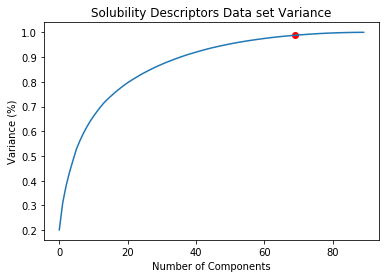

In [86]:
percen1=np.cumsum(pca.explained_variance_ratio_)[a1[0]]
print('Best n. components: %4d, with comulative variance (%%): %1.3f' %(n_comp, percen1))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(a1[0],np.cumsum(pca.explained_variance_ratio_)[a1[0]],c='r')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Solubility Descriptors Data set Variance')
plt.show()
#pca = PCA()

### * ** PCA on the bigger data set and choice of the best number of components (cumulative variance~0.988-0.99 **

In [87]:
%matplotlib inline
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train_bd)
#Plotting the Cumulative Summation of the Explained Variance
a_boolean=(np.cumsum(pca.explained_variance_ratio_)< 0.99) & (np.cumsum(pca.explained_variance_ratio_)>0.988)
#print(a_boolean)
#print(np.cumsum(pca.explained_variance_ratio_))
a1=[i for i, x in enumerate(a_boolean) if x]
n_comp1=a1[0]+1
print('Optimal number of components: %4d' %(n_comp1))

Optimal number of components:  222


Best n. components:  222, with comulative variance (%): 0.988


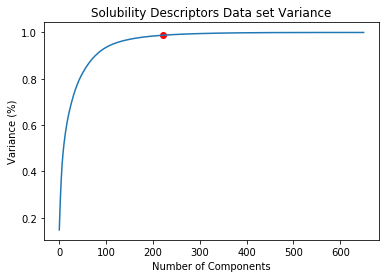

In [88]:
percen1=np.cumsum(pca.explained_variance_ratio_)[a1[0]]
print('Best n. components: %4d, with comulative variance (%%): %1.3f' %(n_comp1, percen1))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(a1[0],np.cumsum(pca.explained_variance_ratio_)[a1[0]],c='r')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Solubility Descriptors Data set Variance')
plt.show()
#pca = PCA()

### * ** set of functions defining the pipeline of choice: 1) ANOVA+Ridge regressot 2) ANOVA+AdaBooster regressor
### * Also used SelectKBEST as ANOVA filter and 1) Randomized or 2) Grid Search

In [89]:
def random_ridge(cv_dat,n_comp,X_train,y_train):
    np.seterr(divide='ignore', invalid='ignore')
    i=n_comp
    reg = Ridge()
    int1=int(i/10)
    print(int1)
    anova_filter = SelectKBest(f_regression, k=i)
    pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    #pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    pipe.fit(X_train, y_train)
    pipe.score(X_train, y_train)
    param_dist = {"anova__score_func": [mutual_info_regression, f_regression],
                "anova__k": sp_randint(i-int1, i),
                "regressor__alpha": [0.01,0.1,1.0,10.0,100.0]}
    
    test = RandomizedSearchCV(pipe,
                              param_distributions = param_dist,
                              cv=cv_dat,
                              n_iter=100)

    test.fit(X_train, y_train)
    print(test.score(X_train,y_train))
    print(test.best_estimator_)
    #print(test.best_score_)
    mask = anova_filter.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X_train.columns.values):
        if bool:
            new_features.append(feature)
    print(i,new_features)
    return new_features,test

In [90]:
def grid_ridge(cv_dat,n_comp,X_train,y_train):
    np.seterr(divide='ignore', invalid='ignore')
    i=n_comp
    reg = Ridge()
    anova_filter = SelectKBest(f_regression, k=i)
    pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    #pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    pipe.fit(X_train, y_train)
    pipe.score(X_train, y_train)
    param_dist = {"anova__score_func": [mutual_info_regression, f_regression],
                "regressor__alpha": [0.01,0.1,1.0,10.0,100.0]}
    
    test = GridSearchCV(pipe,
                        param_grid = param_dist,
                        cv=cv_dat)

    test.fit(X_train, y_train)
    print(test.score(X_train,y_train))
    print(test.best_estimator_)
    #print(test.best_score_)
    mask = anova_filter.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool1, feature in zip(mask, X_train.columns.values):
        if bool1:
            new_features.append(feature)
    print(i,new_features)
    return new_features,test

In [91]:
def random_adab(cv_dat,n_comp,X_train,y_train):
    np.seterr(divide='ignore', invalid='ignore')
    i=n_comp
    reg = AdaBoostRegressor()
    int1=int(i/10)
    print(int1)
    anova_filter = SelectKBest(f_regression, k=i)
    pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    pipe.fit(X_train, y_train)
    pipe.score(X_train, y_train)
    param_dist = {"anova__score_func": [mutual_info_regression, f_regression],
                "anova__k": sp_randint(i-int1, i),
                "regressor__n_estimators": [50, 100],
                'regressor__learning_rate' : [0.01,0.05,0.1,0.3,1],
                'regressor__loss' : ['linear', 'square', 'exponential']}
              
    test = RandomizedSearchCV(pipe,
                              param_distributions = param_dist,
                              cv=cv_dat,
                              n_iter=100)

    test.fit(X_train, y_train)
    print(test.score(X_train,y_train))
    print(test.best_estimator_)
    #print(test.best_score_)
    mask = anova_filter.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool1, feature in zip(mask, X_train.columns.values):
        if bool1:
            new_features.append(feature)
    print(i,new_features)
    np.seterr(divide='warn', invalid='warn')
    return new_features,test

In [92]:
def grid_adab(cv_dat,n_comp,X_train,y_train):
    np.seterr(divide='ignore', invalid='ignore')
    i=n_comp
    reg = AdaBoostRegressor()
    anova_filter = SelectKBest(f_regression, k=i)
    pipe = Pipeline(steps=[('anova', anova_filter),('regressor', reg)])
    pipe.fit(X_train, y_train)
    pipe.score(X_train, y_train)
    param_dist = {"anova__score_func": [mutual_info_regression, f_regression],
                "regressor__n_estimators": [50, 100],
                'regressor__learning_rate' : [0.01,0.05,0.1,0.3,1],
                'regressor__loss' : ['linear', 'square', 'exponential']}
              
    test = GridSearchCV(pipe,
                        param_grid = param_dist,
                        cv=cv_dat)

    test.fit(X_train, y_train)
    print(test.score(X_train,y_train))
    print(test.best_estimator_)
    #print(test.best_score_)
    mask = anova_filter.get_support() #list of booleans
    new_features = [] # The list of your K best features

    for bool1, feature in zip(mask, X_train.columns.values):
        if bool1:
            new_features.append(feature)
    print(i,new_features)
    np.seterr(divide='warn', invalid='warn')
    return new_features,test

### * model training Random and Grid AdaBoost regressor

In [93]:
%%time
cv_dat=3
feature1,radab_cv3=random_adab(cv_dat,n_comp,X_train,y_train_log)

7
0.9233874395593822
Pipeline(memory=None,
         steps=[('anova',
                 SelectKBest(k=67,
                             score_func=<function mutual_info_regression at 0x1a227e3f28>)),
                ('regressor',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1,
                                   loss='exponential', n_estimators=50,
                                   random_state=None))],
         verbose=False)
70 ['MW', 'Sv', 'nBM', 'nAB', 'nCsp2', 'nBnz', 'D/Dtr06', 'Xt', 'MSD', 'piPC02', 'piPC07', 'piPC09', 'piID', 'PCR', 'PCD', 'IDDE', 'VE1_A', 'J_D', 'VE1_X', 'VE2_X', 'VE2_D/Dt', 'Chi_Dz(Z)', 'J_Dz(Z)', 'VE1_B(m)', 'AVS_B(v)', 'SpMaxA_B(s)', 'VE1_B(s)', 'ATS8m', 'ATS7e', 'GATS7p', 'GATS8p', 'GATS7i', 'GATS8i', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)', 'SpMax5_Bh(m)', 'SpMax2_Bh(v)', 'SpMax3_Bh(v)', 'SpMax4_Bh(v)', 'SpMin2_Bh(m)', 'SpMin3_Bh(m)', 'SpMin2_Bh(v)', 'SpMin3_Bh(v)', 'P_VSA_MR_6', 'P_VSA_m_2', 'P_VSA_v_3', 'P_VSA_e_2', 'P_VSA_s_4', 'Eta_FL', '

In [94]:
%%time
cv_dat=3
feature1,gadab_cv3=grid_adab(cv_dat,n_comp,X_train,y_train_log)

0.9161258054085376
Pipeline(memory=None,
         steps=[('anova',
                 SelectKBest(k=70,
                             score_func=<function mutual_info_regression at 0x1a227e3f28>)),
                ('regressor',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1,
                                   loss='linear', n_estimators=50,
                                   random_state=None))],
         verbose=False)
70 ['MW', 'Sv', 'nBM', 'nAB', 'nCsp2', 'nBnz', 'D/Dtr06', 'Xt', 'MSD', 'piPC02', 'piPC07', 'piPC09', 'piID', 'PCR', 'PCD', 'IDDE', 'VE1_A', 'J_D', 'VE1_X', 'VE2_X', 'VE2_D/Dt', 'Chi_Dz(Z)', 'J_Dz(Z)', 'VE1_B(m)', 'AVS_B(v)', 'SpMaxA_B(s)', 'VE1_B(s)', 'ATS8m', 'ATS7e', 'GATS7p', 'GATS8p', 'GATS7i', 'GATS8i', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)', 'SpMax5_Bh(m)', 'SpMax2_Bh(v)', 'SpMax3_Bh(v)', 'SpMax4_Bh(v)', 'SpMin2_Bh(m)', 'SpMin3_Bh(m)', 'SpMin2_Bh(v)', 'SpMin3_Bh(v)', 'P_VSA_MR_6', 'P_VSA_m_2', 'P_VSA_v_3', 'P_VSA_e_2', 'P_VSA_s_4', 'Eta_FL', 'SpMaxA_

### * model training Random and Grid Ridge regressor

In [95]:
%%time
cv_dat=3
feature1,rridge_cv3=random_ridge(cv_dat,n_comp,X_train,y_train_log)

7
0.7359649309749998
Pipeline(memory=None,
         steps=[('anova',
                 SelectKBest(k=64,
                             score_func=<function mutual_info_regression at 0x1a227e3f28>)),
                ('regressor',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
70 ['MW', 'Sv', 'nBM', 'nAB', 'nCsp2', 'nBnz', 'D/Dtr06', 'Xt', 'MSD', 'piPC02', 'piPC07', 'piPC09', 'piID', 'PCR', 'PCD', 'IDDE', 'VE1_A', 'J_D', 'VE1_X', 'VE2_X', 'VE2_D/Dt', 'Chi_Dz(Z)', 'J_Dz(Z)', 'VE1_B(m)', 'AVS_B(v)', 'SpMaxA_B(s)', 'VE1_B(s)', 'ATS8m', 'ATS7e', 'GATS7p', 'GATS8p', 'GATS7i', 'GATS8i', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)', 'SpMax5_Bh(m)', 'SpMax2_Bh(v)', 'SpMax3_Bh(v)', 'SpMax4_Bh(v)', 'SpMin2_Bh(m)', 'SpMin3_Bh(m)', 'SpMin2_Bh(v)', 'SpMin3_Bh(v)', 'P_VSA_MR_6', 'P_VSA_m_2', 'P_VSA_v_3', 'P_VSA_e_2', 'P_VSA_s_4', 'Eta_FL', 'SpMaxA_EA

In [96]:
%%time
cv_dat=3
feature1,gridge_cv3=grid_ridge(cv_dat,n_comp,X_train,y_train_log)

0.5550841442083445
Pipeline(memory=None,
         steps=[('anova',
                 SelectKBest(k=70,
                             score_func=<function f_regression at 0x1a2267b8c8>)),
                ('regressor',
                 Ridge(alpha=10.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
70 ['MW', 'Sv', 'nBM', 'nAB', 'nCsp2', 'nBnz', 'D/Dtr06', 'Xt', 'MSD', 'piPC02', 'piPC07', 'piPC09', 'piID', 'PCR', 'PCD', 'IDDE', 'VE1_A', 'J_D', 'VE1_X', 'VE2_X', 'VE2_D/Dt', 'Chi_Dz(Z)', 'J_Dz(Z)', 'VE1_B(m)', 'AVS_B(v)', 'SpMaxA_B(s)', 'VE1_B(s)', 'ATS8m', 'ATS7e', 'GATS7p', 'GATS8p', 'GATS7i', 'GATS8i', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)', 'SpMax5_Bh(m)', 'SpMax2_Bh(v)', 'SpMax3_Bh(v)', 'SpMax4_Bh(v)', 'SpMin2_Bh(m)', 'SpMin3_Bh(m)', 'SpMin2_Bh(v)', 'SpMin3_Bh(v)', 'P_VSA_MR_6', 'P_VSA_m_2', 'P_VSA_v_3', 'P_VSA_e_2', 'P_VSA_s_4', 'Eta_FL', 'SpMaxA_EA(ed)', 'SM1

### * model prediction using Random and Grid Ridge and AdaBoost regressors

In [97]:
y_hat_radab=radab_cv3.predict(X_pred)
print(y_hat_radab)

[-3.07714772 -3.23092522 -3.6716648  -1.97868469 -3.68034836 -4.56515795
 -3.97365454 -4.60656656 -3.66238015 -3.14289917 -3.89039775 -3.26911881
 -2.85244619 -4.12276228 -5.68642371 -3.97365454 -2.84529922 -4.69484255
 -2.84529922 -3.04108358 -3.32267502 -1.73827403 -3.01706193 -2.84529922
 -4.57920589 -3.3161582  -3.01706193 -3.04971463]


In [98]:
y_hat_gadab=gadab_cv3.predict(X_pred)
print(y_hat_gadab)

[-2.95193634 -2.98461207 -3.4449466  -1.87095789 -3.52547554 -4.49960029
 -3.83803355 -4.94151908 -3.23671925 -3.14077825 -3.49114053 -3.37041274
 -2.82864344 -4.0964556  -5.11858384 -3.94999584 -2.43194298 -4.73059287
 -2.73154768 -2.43194298 -3.37041274 -1.87095789 -2.98461207 -3.07433113
 -4.38658023 -3.50808542 -2.48927794 -3.37041274]


In [99]:
y_hat_rridge=rridge_cv3.predict(X_pred)
print(y_hat_rridge)

[-3.54561243 -3.07264783 -3.78159854 -1.57601451 -4.13606748 -4.23689394
 -3.51878949 -5.07609271 -4.59993351 -1.93120314 -5.25394878 -3.99131808
 -2.41372704 -4.08582636 -5.41886908 -4.2886815  -2.29976324 -5.97359464
 -2.32490619 -3.16072991 -3.49515464 -1.02368661 -3.20359283 -3.40870638
 -6.06677704 -3.83643246 -2.59469355 -2.4595981 ]


In [100]:
y_hat_gridge=gridge_cv3.predict(X_pred)
print(y_hat_gridge)

[-2.79931241 -2.89428319 -3.9259164  -2.01120072 -4.12169198 -4.18781882
 -3.67650352 -4.10449569 -3.65937919 -3.42810845 -4.61966641 -3.48912557
 -2.54044389 -4.11624762 -5.13614467 -4.33257575 -2.62197585 -4.82430836
 -2.94587582 -2.68554652 -3.44533427 -1.56032738 -3.13813699 -3.0019764
 -5.43642304 -3.25607461 -2.59508994 -3.31006833]


In [105]:
def percentage1(y_ref,y_hat,per_lim,tot1):
    percent=(y_ref-y_hat)/y_ref*100.
    count1=(percent<=per_lim) & (percent>=-per_lim)
    percent1=100.-((tot1-count1.sum())/tot1*100.)
    percent=round(percent,2)
    percent1=round(percent1,2)
    return percent,percent1,count1.sum()

In [106]:
radab_list=[]
rridge_list=[]
for i in [10.,20.,40.,60.]:
    likeness,per_int,coun1=percentage1(y_ref_log,y_hat_radab,i,S0_pred_descrip['name'].size)
    radab_list.append(per_int)
print(radab_list)
for i in [10.,20.,40.,60.]:
    likeness,per_int,coun1=percentage1(y_ref_log,y_hat_rridge,i,S0_pred_descrip['name'].size)
    rridge_list.append(per_int)
print(rridge_list)
idx_rename = {0:'|error| <= 10%',1:'|error| <= 20%', 2:'|error| <= 40%',3:'|error| <= 60%'} 
sum_results1=pd.DataFrame.from_dict({'Random AdaBoost (%)': radab_list, 'Random Ridge (%)': rridge_list})
sum_results=sum_results1.rename(index=idx_rename)
print(sum_results)

[35.71, 53.57, 82.14, 92.86]
[21.43, 50.0, 85.71, 92.86]
                Random AdaBoost (%)  Random Ridge (%)
|error| <= 10%                35.71             21.43
|error| <= 20%                53.57             50.00
|error| <= 40%                82.14             85.71
|error| <= 60%                92.86             92.86


,Random AdaBoost (%),Random Ridge (%)
|error| <= 10%,35.71,21.43
|error| <= 20%,53.57,50.00
|error| <= 40%,82.14,85.71
|error| <= 60%,92.86,92.86


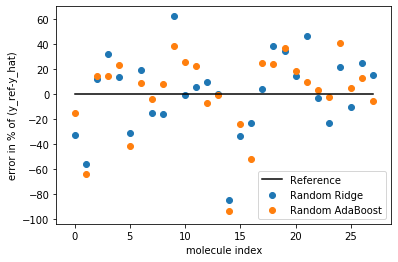

In [109]:
#plt.scatter(np.log10(y_ref*1.e-6),np.log10(y_ref*1.e-6))
plt.plot(range(0,S0_pred_descrip['name'].size),y_ref_log-y_ref_log,'k-',label='Reference')
plt.scatter(range(0,S0_pred_descrip['name'].size),(y_ref_log-y_hat_rridge)
            /y_ref_log*100.,label='Random Ridge')
plt.scatter(range(0,S0_pred_descrip['name'].size),(y_ref_log-y_hat_radab)
            /y_ref_log*100.,label='Random AdaBoost')
plt.xlabel('molecule index')
plt.ylabel('error in % of (y_ref-y_hat)')
plt.legend()
#plt.scatter(y_hat_radab1,y_ref)
sum_results

In [110]:
gadab_list=[]
gridge_list=[]
for i in [10.,20.,40.,60.]:
    likeness,per_int,coun1=percentage1(y_ref_log,y_hat_gadab,i,S0_pred_descrip['name'].size)
    gadab_list.append(per_int)
print(gadab_list)
for i in [10.,20.,40.,60.]:
    likeness,per_int,coun1=percentage1(y_ref_log,y_hat_gridge,i,S0_pred_descrip['name'].size)
    gridge_list.append(per_int)
print(gridge_list)
idx_rename = {0:'|error| <= 10%',1:'|error| <= 20%', 2:'|error| <= 40%',3:'|error| <= 60%'} 
sum_results1=pd.DataFrame.from_dict({'Grid AdaBoost (%)': gadab_list, 'Grid Ridge (%)': gridge_list})
sum_results=sum_results1.rename(index=idx_rename)
print(sum_results)

[17.86, 50.0, 85.71, 96.43]
[32.14, 60.71, 89.29, 96.43]
                Grid AdaBoost (%)  Grid Ridge (%)
|error| <= 10%              17.86           32.14
|error| <= 20%              50.00           60.71
|error| <= 40%              85.71           89.29
|error| <= 60%              96.43           96.43


,Grid AdaBoost (%),Grid Ridge (%)
|error| <= 10%,17.86,32.14
|error| <= 20%,50.00,60.71
|error| <= 40%,85.71,89.29
|error| <= 60%,96.43,96.43


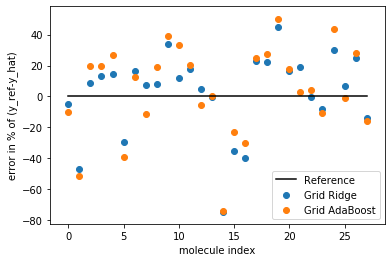

In [113]:
#plt.scatter(np.log10(y_ref*1.e-6),np.log10(y_ref*1.e-6))
plt.plot(range(0,S0_pred_descrip['name'].size),y_ref_log-y_ref_log,'k-',label='Reference')
plt.scatter(range(0,S0_pred_descrip['name'].size),(y_ref_log-y_hat_gridge)
            /y_ref_log*100.,label='Grid Ridge')
plt.scatter(range(0,S0_pred_descrip['name'].size),(y_ref_log-y_hat_gadab)
            /y_ref_log*100.,label='Grid AdaBoost')
plt.xlabel('molecule index')
plt.ylabel('error in % of (y_ref-y_hat)')
plt.legend()
#plt.scatter(y_hat_radab1,y_ref)
sum_results

Interestingly, Rdige and AdaBooster regressors show comparable performances.
In particular: 
* with RandomizedSearch under 20% of error AdaBooster shows a better prediction power
* with GridSearch under 20% of error Ridge is a better regressor

In general, even with the smaller training data set we obtaion decent predictions (inside 20% of error more than 60% of molecules solubility has been predicted)

In [ ]:
%%time
cv_dat=3
feature1,radab_bd_cv3=random_adab(cv_dat,n_comp,X_train_bd,y_train_bd_log)

In [ ]:
X_train_bd.describe(include='all')

In [ ]:
boolean_test=y_train_bd_log.isna()
y_train_bd_log[boolean_test]

In [ ]:
%%time
cv_dat=3
feature1,gadab_bd_cv3=grid_adab(cv_dat,n_comp,X_train_bd,y_train_bd_log)

In [ ]:
%%time
cv_dat=3
feature1,rridge_bd_cv3=random_ridge(cv_dat,n_comp,X_train_bd,y_train_bd_log)

In [ ]:
%%time
cv_dat=3
feature1,gridge_bd_cv3=grid_ridge(cv_dat,n_comp,X_train_bd,y_train_bd_log)